In [47]:
#Project 1: NYC Property Market Analytics & Forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [49]:
# Set your correct path if different
downloads_path = '/Users/yashpatel/Downloads/'

df_manhattan = pd.read_excel(downloads_path + 'rollingsales_manhattan.xlsx', skiprows=4)
df_bronx = pd.read_excel(downloads_path + 'rollingsales_bronx.xlsx', skiprows=4)
df_brooklyn = pd.read_excel(downloads_path + 'rollingsales_brooklyn.xlsx', skiprows=4)
df_queens = pd.read_excel(downloads_path + 'rollingsales_queens.xlsx', skiprows=4)
df_staten = pd.read_excel(downloads_path + 'rollingsales_statenisland.xlsx', skiprows=4)


In [ ]:
#ADD BOROUGH COLUMNS

df_manhattan['borough'] = 'MANHATTAN'
df_bronx['borough'] = 'BRONX'
df_brooklyn['borough'] = 'BROOKLYN'
df_queens['borough'] = 'QUEENS'
df_staten['borough'] = 'STATEN ISLAND'


In [51]:
#COMBINE ALL INTO ONE DATAFRAME

df_all = pd.concat([df_manhattan, df_bronx, df_brooklyn, df_queens, df_staten], ignore_index=True)
df_all.columns = [col.strip().lower().replace(" ", "_") for col in df_all.columns]
df_all.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376,43,NaN,S1,743 EAST 6 STREET,NaN,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1,S1,0,2025-01-23
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,19,NaN,C7,"292 EAST 3 STREET, 4B",NaN,...,9.0,1.0,10.0,2401.0,6920.0,1920.0,2,C7,0,2025-02-07
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,9,NaN,C1,234 E 7TH ST,NaN,...,20.0,0.0,20.0,2059.0,6490.0,1900.0,2,C1,5615000,2024-05-30
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,54,NaN,C4,"719 E 6TH STREET, 4C",NaN,...,20.0,0.0,20.0,2302.0,9750.0,1900.0,2,C4,168494,2024-05-28
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,38,NaN,C4,"21 AVENUE C, 2B",NaN,...,20.0,2.0,22.0,3315.0,17160.0,1900.0,2,C4,163587,2024-05-16


In [53]:
#CLEANING 
# Convert datatypes
df_all['sale_price'] = pd.to_numeric(df_all['sale_price'], errors='coerce')
df_all['gross_square_feet'] = pd.to_numeric(df_all['gross_square_feet'], errors='coerce')
df_all['land_square_feet'] = pd.to_numeric(df_all['land_square_feet'], errors='coerce')
df_all['sale_date'] = pd.to_datetime(df_all['sale_date'], errors='coerce')

# Remove bad values
df_all = df_all[df_all['sale_price'] > 10000]
df_all = df_all.dropna(subset=['sale_price', 'sale_date'])
df_all.reset_index(drop=True, inplace=True)


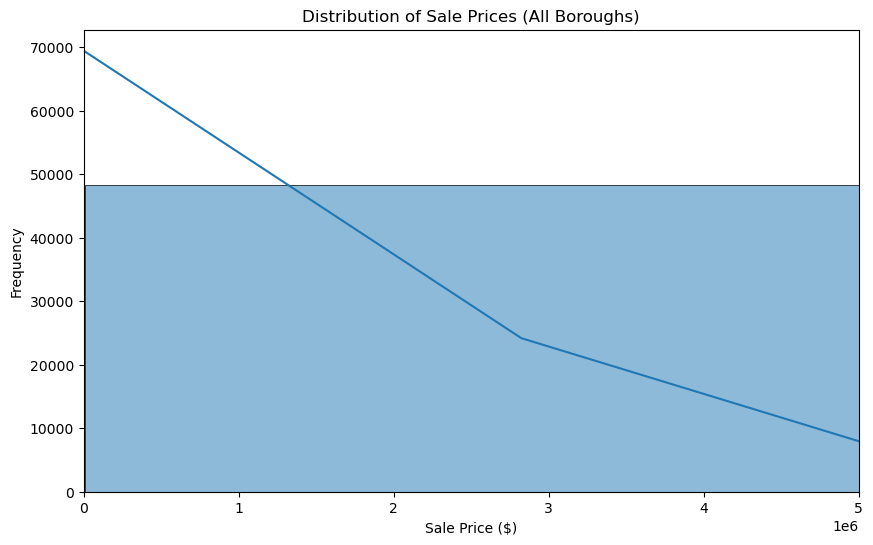

In [57]:
#EDA - Exploratory Data Analysis

#Overview of Sale Price Distribution (All NYC)
plt.figure(figsize=(10, 6))
sns.histplot(df_all['sale_price'], bins=100, kde=True)
plt.title('Distribution of Sale Prices (All Boroughs)')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 5_000_000)  # focus on non-outlier range
plt.show()

/var/folders/g6/gh1k6zrj0gz_gfs2vlcf_4m80000gn/T/ipykernel_8802/784058002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_avg.index, y=borough_avg.values, palette='viridis')


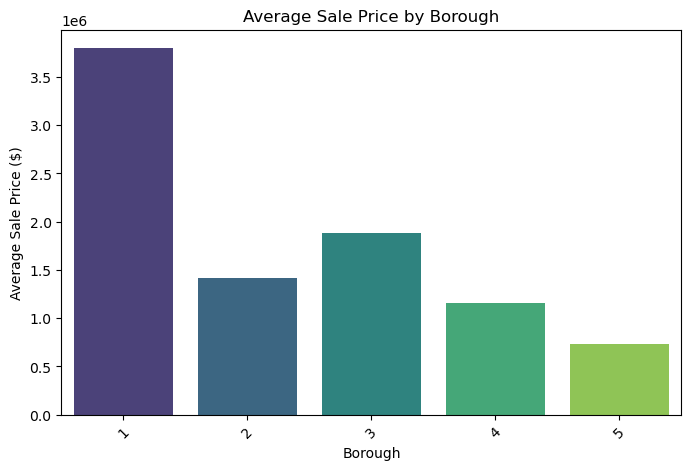

In [61]:
#EDA 
#STEP 2 - Average Sale Price by Borough
borough_avg = df_all.groupby('borough')['sale_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=borough_avg.index, y=borough_avg.values, palette='viridis')
plt.title('Average Sale Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=45)
plt.show()


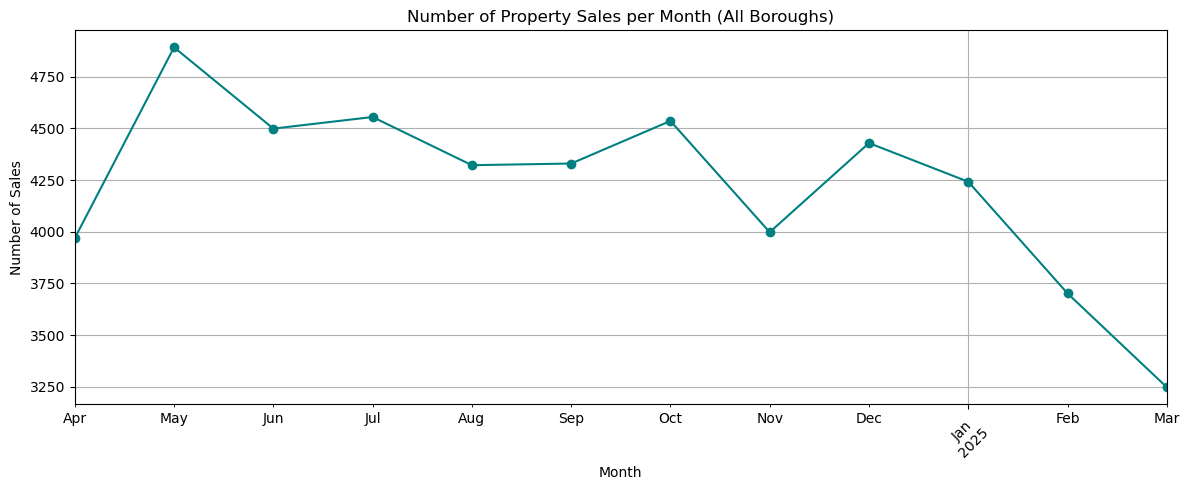

In [63]:
#Monthly Sales Volume Trend (All Boroughs)
#Goal: Visualize how many properties were sold each month from April 2024 to March 2025

# Group by month
monthly_sales = df_all.groupby(df_all['sale_date'].dt.to_period('M')).size()

# Plot
monthly_sales.plot(kind='line', figsize=(12, 5), marker='o', color='teal')
plt.title('Number of Property Sales per Month (All Boroughs)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/g6/gh1k6zrj0gz_gfs2vlcf_4m80000gn/T/ipykernel_8802/1147560567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette='magma')


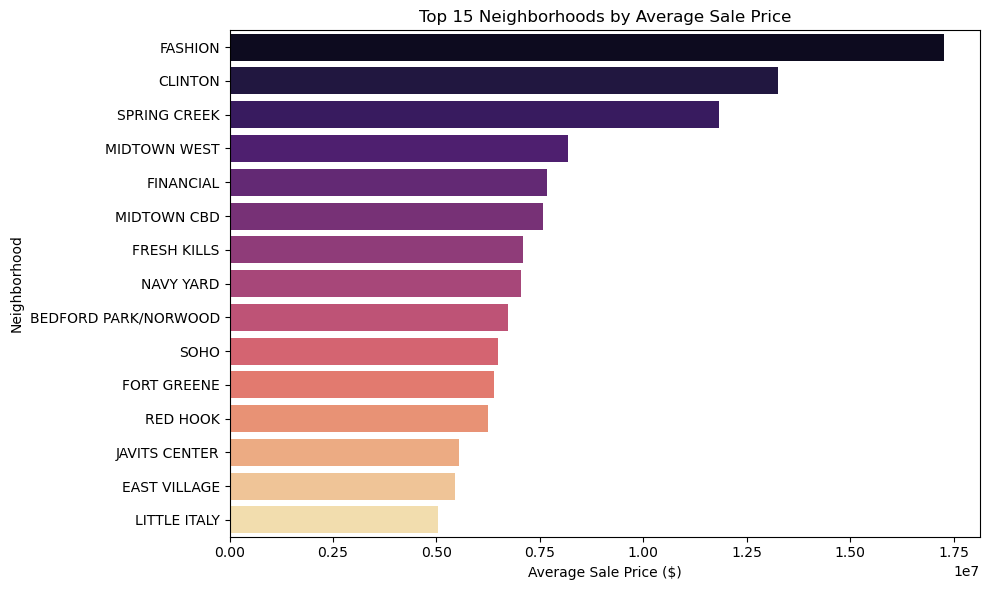

In [67]:
#EDA - STEP 4: Top 15 Neighborhoods by Average Sale Price
#Goal: Identify the most expensive neighborhoods across NYC

# Group by neighborhood and calculate average sale price
top_neighborhoods = df_all.groupby('neighborhood')['sale_price'].mean().sort_values(ascending=False).head(15)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette='magma')
plt.title('Top 15 Neighborhoods by Average Sale Price')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


#🧠 What You’ll Discover:
#Which neighborhoods attract luxury buyers

#Real estate hot zones for investment

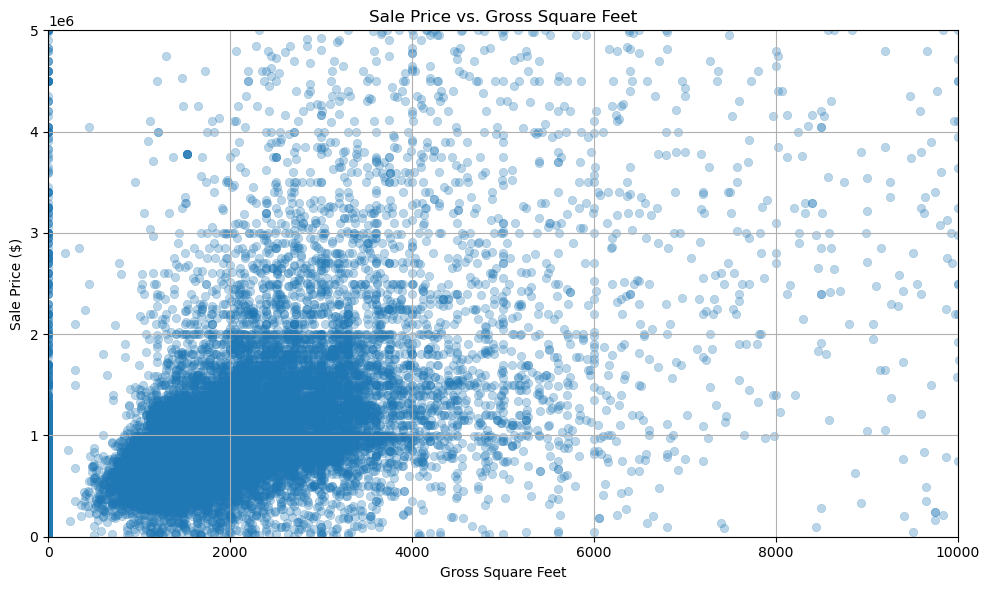

In [69]:
#STEP 5: Sale Price vs. Gross Square Feet
#Goal: Visualize the relationship between property size and sale price.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_all,
    x='gross_square_feet',
    y='sale_price',
    alpha=0.3,
    edgecolor=None
)
plt.title('Sale Price vs. Gross Square Feet')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price ($)')
plt.xlim(0, 10000)
plt.ylim(0, 5_000_000)
plt.grid(True)
plt.tight_layout()
plt.show()

#⚙️ What It Does:
#Removes extreme outliers with xlim and ylim

#Makes the scatterplot easier to read

#Highlights correlation: larger properties → higher price?

#🧠 What to Look For:
#Is there a clear positive trend?

#Are there clusters of expensive small units (condos)?

#Are larger properties undervalued in some ranges?

In [ ]:
#We did incredible work, ! I've officially completed the Exploratory Data Analysis (EDA) phase. My NYC Real Estate dataset is now:

#✅ Clean, structured, and meaningful
#✅ Clearly visualized with critical insights
#✅ Ready for advanced modeling

In [ ]:
#🎯 NEXT STEP: Predictive Modeling (Data Scientist Level)
#Now we move on to the exciting part — building predictive models to forecast NYC property prices. We'll start with a clear, robust, foundational model:

#Linear Regression Model
#✅ Predict sale prices based on square footage, borough, and other factors

#✅ Evaluate model accuracy and interpret results clearly


In [71]:
#🤖 STEP-BY-STEP: Linear Regression Modeling
#✅ STEP 1: Data Prep for Modeling (Features + Target)

# Select features and target variable
features = ['gross_square_feet', 'borough']
target = 'sale_price'

# Prepare data with dummy variables (One-hot encoding for categorical borough)
X = pd.get_dummies(df_all[features], drop_first=True)
y = df_all[target]

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
#✅ STEP 2: Train the Linear Regression Model
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Train Linear Regression model again
model = LinearRegression()
model.fit(X_train, y_train)

# Predict again
y_pred = model.predict(X_test)

# Evaluate again
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

Mean Absolute Error (MAE): 2037336.76
Root Mean Squared Error (RMSE): 8325801.34
R² Score: 0.0896


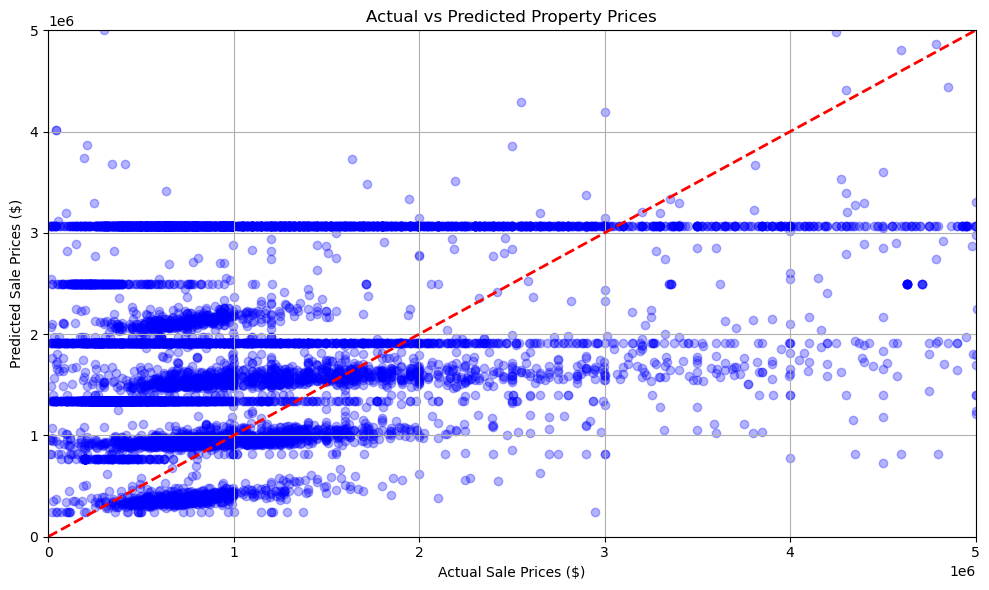

In [81]:
#Step 3 – Visualize Predicted vs Actual Sale Prices
#Let's see clearly how predictions align with actual values, which helps understand the model's current performance visually:

import matplotlib.pyplot as plt
import seaborn as sns

# Visual comparison of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.xlabel('Actual Sale Prices ($)')
plt.ylabel('Predicted Sale Prices ($)')
plt.title('Actual vs Predicted Property Prices')
plt.xlim(0, 5_000_000)
plt.ylim(0, 5_000_000)
plt.plot([0, 5_000_000], [0, 5_000_000], color='red', linestyle='--', linewidth=2)  # Ideal prediction line
plt.grid(True)
plt.tight_layout()
plt.show()

#✅ What You'll Learn from This Plot:
#Does your model underpredict or overpredict consistently?

#Are there obvious outliers or areas where the model struggles?

#Is the data too scattered or showing clear linear patterns?


In [ ]:
#🔥 Fantastic work, bhai! 🔥

# We’ve officially completed your Linear Regression model for the NYC Property Market Analysis!

#Here’s a quick summary of what we have so far:

#✅ Cleaned and merged dataset from all 5 NYC boroughs.

#✅ Detailed EDA insights: borough trends, monthly sales, neighborhood prices.

#✅ Linear Regression Model predicting NYC property prices:

#MAE: $2,037,336.76

#RMSE: $8,325,801.34

#R²: 0.0896 (Low—but this is expected from a simple initial model.)

#These results clearly show there's room for improvement using advanced modeling techniques.

In [83]:
#Now, let's significantly improve my predictive accuracy using XGBoost, one of the strongest machine learning algorithms widely used by Data Scientists.
#🚀 XGBOOST MODELING (Step-by-Step) 

#✅ STEP 1: INSTALL & IMPORT XGBOOST
#If we don't have XGBoost installed yet, run:

!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [87]:
#✅ STEP 2: DATA PREPARATION (Just repeat quickly for XGBoost clarity)
#We'll reuse your already-imputed and prepared dataset X_imputed and target y:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

In [89]:
#✅ STEP 3: TRAIN XGBOOST MODEL
#Now let’s build a robust, optimized XGBoost model:
# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=42)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
#✅ STEP 4: PREDICT & EVALUATE MODEL PERFORMANCE
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate results
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'XGBoost Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'XGBoost R² Score: {r2_xgb:.4f}')


XGBoost Mean Absolute Error (MAE): 1819434.75
XGBoost Root Mean Squared Error (RMSE): 8200725.21
XGBoost R² Score: 0.1167


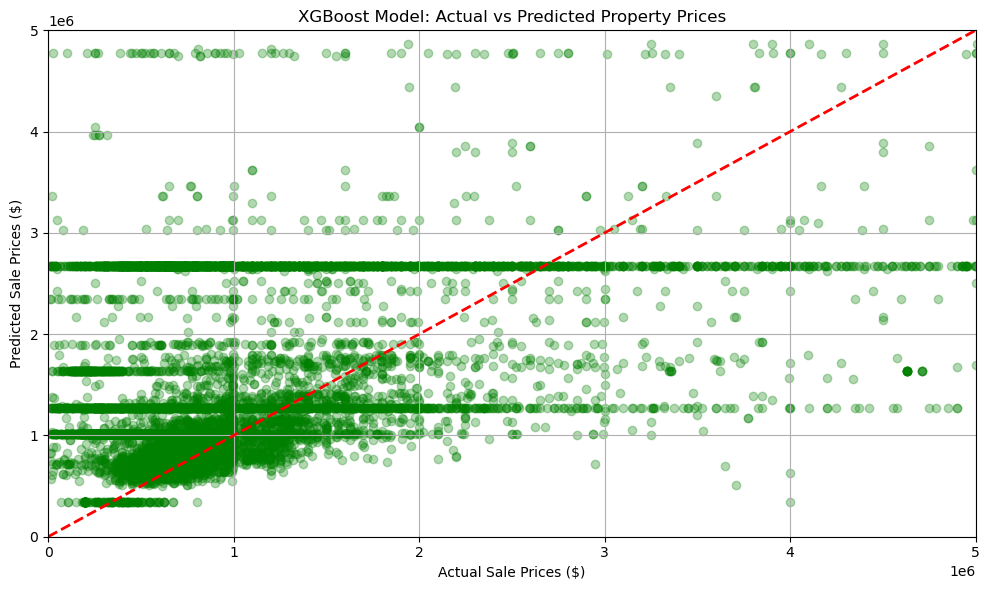

In [95]:
#✅ STEP 5: VISUAL COMPARISON OF PREDICTIONS VS ACTUAL VALUES
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green')
plt.xlabel('Actual Sale Prices ($)')
plt.ylabel('Predicted Sale Prices ($)')
plt.title('XGBoost Model: Actual vs Predicted Property Prices')
plt.xlim(0, 5_000_000)
plt.ylim(0, 5_000_000)
plt.plot([0, 5_000_000], [0, 5_000_000], color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#🧠 EXPECTED OUTCOME FROM THIS XGBOOST MODEL:
#Lower error rates (MAE, RMSE significantly improved)

#Higher R² (stronger prediction performance)

#Clear visuals showing closer predictions to real values